# ***Pytorch Activation***

In [8]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from probml_utils import latexify, savefig, is_latexify_enabled
from scipy.special import erfc

In [2]:
latexify(width_scale_factor=2, fig_height=1.5)

D:\ML_DL\probml-utils\probml_utils\plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
# Plots various neural net activation functions.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def relu(z):
    return np.maximum(0, z)


def heaviside(z):
    return z > 0


def softplus(z):
    return np.log(1 + np.exp(z))


def lrelu(z, lam=0.1):
    return np.maximum(lam * z, z)


def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)


def elu2(z, lam=0.5):
    return np.maximum(0, z) + np.minimum(0, lam * (np.exp(z) - 1))


def swish(z):
    return z * sigmoid(z)

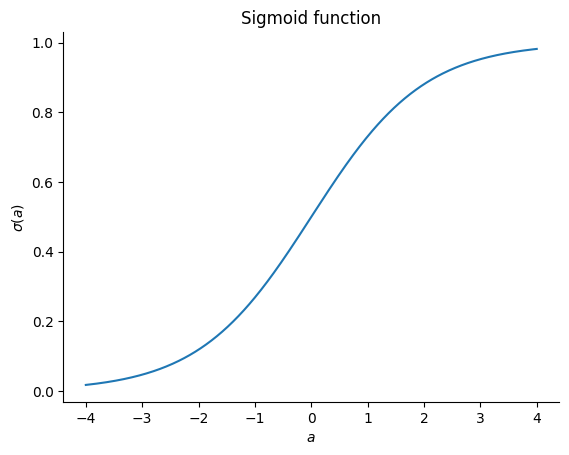

In [5]:
# sigmoid plot
fig = plt.figure()
a = np.linspace(-4, 4, 500)
y_sigmoid = sigmoid(a)
plt.plot(a, y_sigmoid, c="tab:blue")
plt.xlabel("$a$")
plt.ylabel("$\sigma(a)$")
plt.title("Sigmoid function")
sns.despine()
# savefig("sigmoid_activation.pdf")

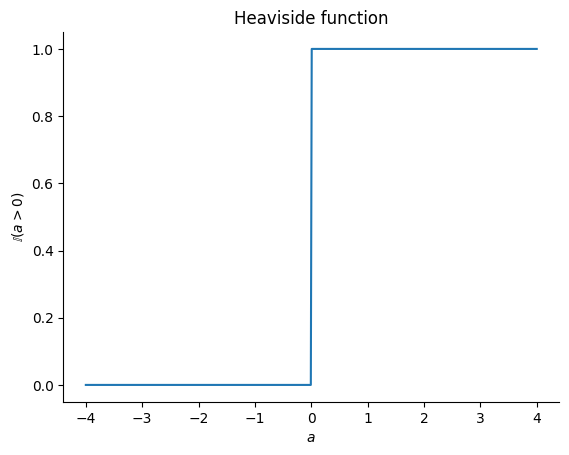

In [6]:
# heaviside plot
if is_latexify_enabled():
    plt.rcParams.update({"text.latex.preamble": r"\usepackage{amsfonts}"})  # to support identity symbol in latex

fig = plt.figure()
a = np.linspace(-4, 4, 500)
y_heaviside = heaviside(a)
plt.plot(a, y_heaviside, c="tab:blue")
plt.xlabel("$a$")
plt.ylabel("$\mathbb{I}(a>0)$")
plt.title("Heaviside function")
sns.despine()
# savefig("heaviside.pdf")

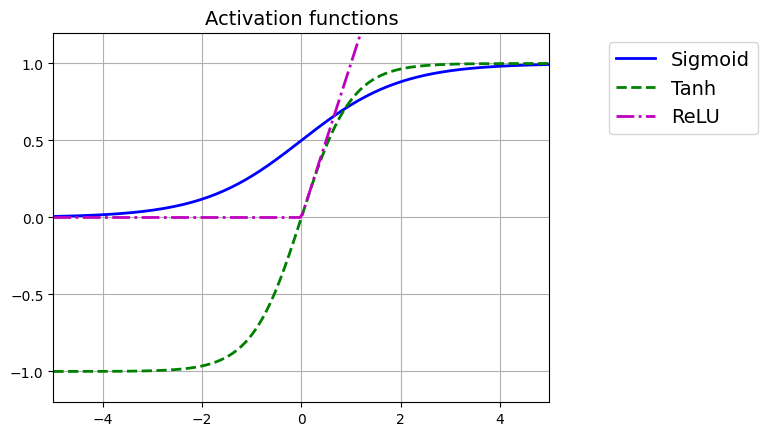

In [10]:
# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the SELU paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e**2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    )
    ** (-1 / 2)
)


def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)


z = np.linspace(-5, 5, 200)

# plt.figure(figsize=(11,4))
plt.figure()
plt.plot(z, sigmoid(z), "b-", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "g--", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.show()

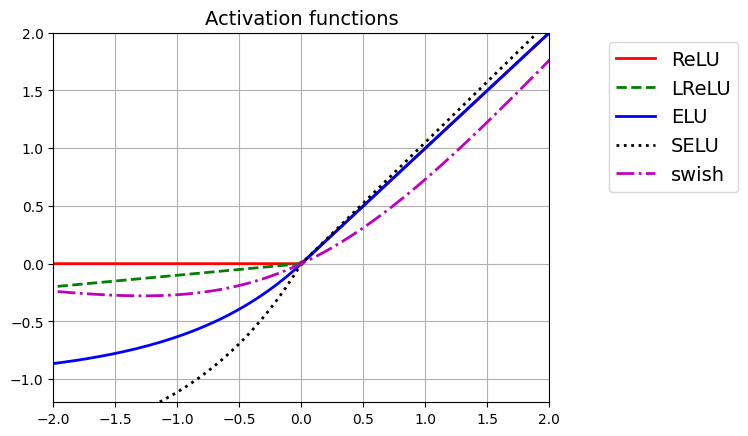

In [11]:
# plt.figure(figsize=(11,4))
plt.figure()
plt.plot(z, relu(z), "r-", linewidth=2, label="ReLU")
plt.plot(z, lrelu(z), "g--", linewidth=2, label="LReLU")
plt.plot(z, elu(z), "b-", linewidth=2, label="ELU")
plt.plot(z, selu(z), "k:", linewidth=2, label="SELU")
plt.plot(z, swish(z), "m-.", linewidth=2, label="swish")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-2, 2, -1.2, 2])
plt.show()

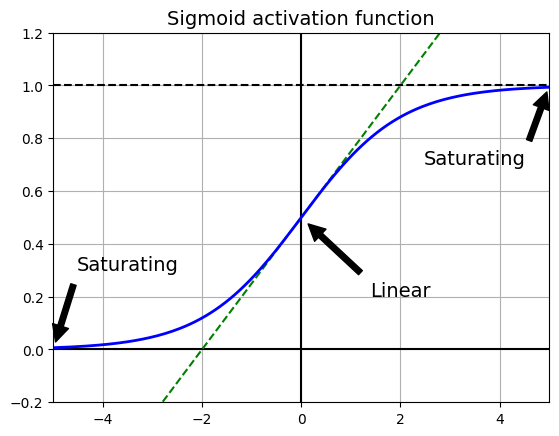

In [12]:
plt.figure()
z = np.linspace(-5, 5, 200)
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [1, 1], "k--")
plt.plot([0, 0], [-0.2, 1.2], "k-")
plt.plot([-5, 5], [-3 / 4, 7 / 4], "g--")
plt.plot(z, sigmoid(z), "b-", linewidth=2)
props = dict(facecolor="black", shrink=0.1)
plt.annotate("Saturating", xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate("Saturating", xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate("Linear", xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()